# Linear Regression Model

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import math

# No Bias Data Set

In [326]:
ts = '70797'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_nb = pd.read_csv(path,header=None).T
df_nb.head()

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/70797_logit_data/70797_logit_rawdata.csv


,0,1,2,3,4,5,6
0,0.0,1.0,-2.15,0.576971,0.760879,0.866923,0.828205
1,0.0,1.0,-2.15,0.588702,0.764396,0.871538,0.930769
2,0.0,1.0,-2.15,0.586490,0.774286,0.866154,0.907692
3,0.0,1.0,-2.15,0.566587,0.747473,0.881538,0.951282
4,0.0,1.0,-2.15,0.574183,0.764835,0.859231,0.964103


In [327]:
df_nb = df_nb.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_nb['bias'] = (math.e**df_nb['alpha']) / (1+math.e**df_nb['alpha'])
df_nb.head()

,alpha,gamma,delta,% Men in J,% Men in M,% Men in S,% Men in E,bias
0,0.0,1.0,-2.15,0.576971,0.760879,0.866923,0.828205,0.5
1,0.0,1.0,-2.15,0.588702,0.764396,0.871538,0.930769,0.5
2,0.0,1.0,-2.15,0.586490,0.774286,0.866154,0.907692,0.5
3,0.0,1.0,-2.15,0.566587,0.747473,0.881538,0.951282,0.5
4,0.0,1.0,-2.15,0.574183,0.764835,0.859231,0.964103,0.5


In [328]:
mean_nb = df_nb.mean()
std_nb = df_nb.std()
hw_nb = 1.96*std_nb/math.sqrt(len(df_nb))

# Biased Dataset

In [344]:
ts = '1196'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_b = pd.read_csv(path,header=None).T
df_b.head()

ts = '02975'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_bb = pd.read_csv(path,header=None).T
df_bb.head()

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/1196_logit_data/1196_logit_rawdata.csv
/Users/saniyavaidya/Documents/4580_final_project/simulation_data/02975_logit_data/02975_logit_rawdata.csv


,0,1,2,3,4,5,6
0,10.0,1.0,-2.15,0.581587,0.746813,0.880769,0.974359
1,10.0,1.0,-2.15,0.583894,0.776044,0.916923,0.974359
2,10.0,1.0,-2.15,0.589471,0.788571,0.890000,1.000000
3,10.0,1.0,-2.15,0.584471,0.718022,0.849231,0.971795
4,10.0,1.0,-2.15,0.570577,0.740659,0.933846,1.000000


In [345]:
df_b = df_b.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_b['bias'] = (math.e**df_b['alpha']) / (1+math.e**df_b['alpha'])
df_b.head()

df_bb = df_bb.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_bb['bias'] = (math.e**df_bb['alpha']) / (1+math.e**df_bb['alpha'])
df_bb.head()

,alpha,gamma,delta,% Men in J,% Men in M,% Men in S,% Men in E,bias
0,10.0,1.0,-2.15,0.581587,0.746813,0.880769,0.974359,0.999955
1,10.0,1.0,-2.15,0.583894,0.776044,0.916923,0.974359,0.999955
2,10.0,1.0,-2.15,0.589471,0.788571,0.890000,1.000000,0.999955
3,10.0,1.0,-2.15,0.584471,0.718022,0.849231,0.971795,0.999955
4,10.0,1.0,-2.15,0.570577,0.740659,0.933846,1.000000,0.999955


In [346]:
mean_b = df_b.mean()
std_b = df_b.std()
hw_b = 1.96*std_b/math.sqrt(len(df_b))

mean_bb = df_bb.mean()
std_bb = df_bb.std()
hw_bb = 1.96*std_bb/math.sqrt(len(df_bb))

# Bias vs. No Bias Comparison

([<matplotlib.axis.XTick at 0x7fa961081eb0>,
 [Text(1, 0, 'J'), Text(2, 0, 'M'), Text(3, 0, 'S'), Text(4, 0, 'E')])

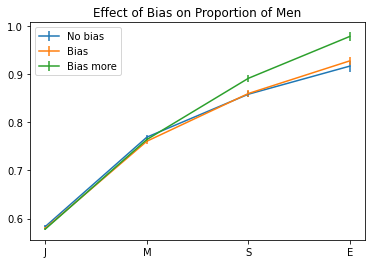

In [373]:
x = [1,2,3,4]
plt.errorbar(x=x, y=mean_nb[3:7], yerr=hw_nb[3:7], label='No bias',)
plt.errorbar(x=x, y=mean_b[3:7], yerr=hw_b[3:7], label='Bias')
plt.errorbar(x=x, y=mean_bb[3:7], yerr=hw_b[3:7], label='Bias more')
plt.legend()
xticks=['J','M','S','E']
plt.title('Effect of Bias on Proportion of Men')
plt.xticks(x,xticks)

# Effect of $\gamma$

In [349]:
ts = '3032'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_hg1 = pd.read_csv(path,header=None).T
print(df_hg1.head())

ts = '2980' 
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_hg2 = pd.read_csv(path,header=None).T
print(df_hg2.head())

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/3032_logit_data/3032_logit_rawdata.csv
     0     1     2         3         4         5         6
0  0.0  10.0 -2.15  0.579087  0.760659  0.875385  0.966667
1  0.0  10.0 -2.15  0.577548  0.764176  0.804615  0.807692
2  0.0  10.0 -2.15  0.598462  0.779341  0.862308  0.943590
3  0.0  10.0 -2.15  0.586058  0.755165  0.860000  0.917949
4  0.0  10.0 -2.15  0.572115  0.734066  0.896923  0.933333
/Users/saniyavaidya/Documents/4580_final_project/simulation_data/2980_logit_data/2980_logit_rawdata.csv
     0     1     2         3         4         5         6
0  0.0  30.0 -2.15  0.574231  0.770989  0.880000  0.958974
1  0.0  30.0 -2.15  0.591538  0.769670  0.860769  0.900000
2  0.0  30.0 -2.15  0.573558  0.751429  0.893846  0.938462
3  0.0  30.0 -2.15  0.588846  0.792747  0.875385  0.928205
4  0.0  30.0 -2.15  0.592500  0.775165  0.864615  0.969231


In [350]:
df_hg1 = df_hg1.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_hg1['bias'] = (math.e**df_hg1['alpha']) / (1+math.e**df_hg1['alpha'])
print(df_hg1.head())

df_hg2 = df_hg2.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_hg2['bias'] = (math.e**df_hg2['alpha']) / (1+math.e**df_hg2['alpha'])
print(df_hg2.head())

   alpha  gamma  delta  % Men in J  % Men in M  % Men in S  % Men in E  bias
0    0.0   10.0  -2.15    0.579087    0.760659    0.875385    0.966667   0.5
1    0.0   10.0  -2.15    0.577548    0.764176    0.804615    0.807692   0.5
2    0.0   10.0  -2.15    0.598462    0.779341    0.862308    0.943590   0.5
3    0.0   10.0  -2.15    0.586058    0.755165    0.860000    0.917949   0.5
4    0.0   10.0  -2.15    0.572115    0.734066    0.896923    0.933333   0.5
   alpha  gamma  delta  % Men in J  % Men in M  % Men in S  % Men in E  bias
0    0.0   30.0  -2.15    0.574231    0.770989    0.880000    0.958974   0.5
1    0.0   30.0  -2.15    0.591538    0.769670    0.860769    0.900000   0.5
2    0.0   30.0  -2.15    0.573558    0.751429    0.893846    0.938462   0.5
3    0.0   30.0  -2.15    0.588846    0.792747    0.875385    0.928205   0.5
4    0.0   30.0  -2.15    0.592500    0.775165    0.864615    0.969231   0.5


In [351]:
mean_hg1 = df_hg1.mean()
std_hg1 = df_hg1.std()
hw_hg1 = 1.96*std_hg1/math.sqrt(len(df_hg1))

mean_hg2 = df_hg2.mean()
std_hg2 = df_hg2.std()
hw_hg2 = 1.96*std_hg2/math.sqrt(len(df_hg2))

([<matplotlib.axis.XTick at 0x7fa9b065e430>,
 [Text(1, 0, 'J'), Text(2, 0, 'M'), Text(3, 0, 'S'), Text(4, 0, 'E')])

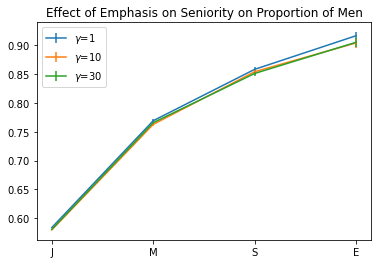

In [353]:
x = [1,2,3,4]
plt.errorbar(x=x, y=mean_nb[3:7], yerr=hw_nb[2:6], label='$\gamma$=1')
plt.errorbar(x=x, y=mean_hg1[3:7], yerr=hw_hg1[2:6], label='$\gamma$=10')
plt.errorbar(x=x, y=mean_hg2[3:7], yerr=hw_hg2[2:6], label='$\gamma$=30')
plt.legend()
xticks=['J','M','S','E']
plt.title('Effect of Emphasis on Seniority on Proportion of Men')
plt.xticks(x,xticks)

# Effect of Shorter Stay Times for Women

In [388]:
ts = '020'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_est = pd.read_csv(path,header=None).T
print(df_est.head())

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/020_logit_data/020_logit_rawdata.csv
     0    1     2         3         4         5         6
0  0.0  1.0 -2.15  0.492452  0.499341  0.473846  0.497436
1  0.0  1.0 -2.15  0.498077  0.467253  0.500769  0.592308
2  0.0  1.0 -2.15  0.484038  0.474286  0.476923  0.620513
3  0.0  1.0 -2.15  0.505337  0.502418  0.478462  0.464103
4  0.0  1.0 -2.15  0.493029  0.491868  0.493846  0.612821


In [389]:
df_est = df_est.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_est['bias'] = (math.e**df_est['alpha']) / (1+math.e**df_est['alpha'])
df_est.head()

,alpha,gamma,delta,% Men in J,% Men in M,% Men in S,% Men in E,bias
0,0.0,1.0,-2.15,0.492452,0.499341,0.473846,0.497436,0.5
1,0.0,1.0,-2.15,0.498077,0.467253,0.500769,0.592308,0.5
2,0.0,1.0,-2.15,0.484038,0.474286,0.476923,0.620513,0.5
3,0.0,1.0,-2.15,0.505337,0.502418,0.478462,0.464103,0.5
4,0.0,1.0,-2.15,0.493029,0.491868,0.493846,0.612821,0.5


In [390]:
mean_est = df_est.mean()
std_est = df_est.std()
hw_est = 1.96*std_est/math.sqrt(len(df_est))

([<matplotlib.axis.XTick at 0x7fa9884b4760>,
 [Text(1, 0, 'J'), Text(2, 0, 'M'), Text(3, 0, 'S'), Text(4, 0, 'E')])

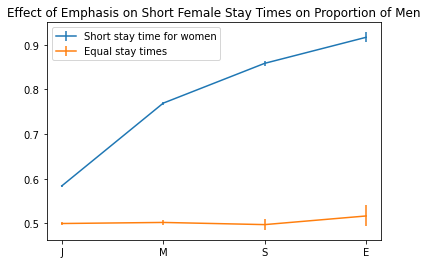

In [391]:
x = [1,2,3,4]
plt.errorbar(x=x, y=mean_nb[3:7], yerr=hw_nb[3:7], label='Short stay time for women')
plt.errorbar(x=x, y=mean_est[3:7], yerr=hw_est[3:7], label='Equal stay times')
plt.legend()
xticks=['J','M','S','E']
plt.title('Effect of Emphasis on Short Female Stay Times on Proportion of Men')
plt.xticks(x,xticks)

(array([2., 2., 3., 4., 8., 8., 3., 6., 2., 2.]),
 array([0.35128205, 0.38384615, 0.41641026, 0.44897436, 0.48153846,
        0.51410256, 0.54666667, 0.57923077, 0.61179487, 0.64435897,
        0.67692308]),
 <BarContainer object of 10 artists>)

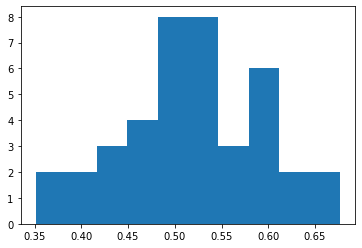

In [392]:
plt.hist(df_est['% Men in E'])

# Maternal Leave Analysis

In [393]:
# No leave dataset
ts = '105'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_nml = pd.read_csv(path,header=None).T
print(df_nml.head())

# With leave dataset
ts = '9385'
sim_type = 'logit'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_ml = pd.read_csv(path,header=None).T
print(df_nml.head())

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/105_logit_data/105_logit_rawdata.csv
       0    1     2         3         4         5         6
0  0.281  1.0 -2.15  0.573221  0.757363  0.863846  0.887179
1  0.281  1.0 -2.15  0.579567  0.754505  0.864615  0.946154
2  0.281  1.0 -2.15  0.584904  0.751868  0.830000  0.864103
3  0.281  1.0 -2.15  0.585433  0.789231  0.877692  0.925641
4  0.281  1.0 -2.15  0.570769  0.758901  0.842308  0.835897
/Users/saniyavaidya/Documents/4580_final_project/simulation_data/9385_logit_data/9385_logit_rawdata.csv
       0    1     2         3         4         5         6
0  0.281  1.0 -2.15  0.573221  0.757363  0.863846  0.887179
1  0.281  1.0 -2.15  0.579567  0.754505  0.864615  0.946154
2  0.281  1.0 -2.15  0.584904  0.751868  0.830000  0.864103
3  0.281  1.0 -2.15  0.585433  0.789231  0.877692  0.925641
4  0.281  1.0 -2.15  0.570769  0.758901  0.842308  0.835897


In [394]:
df_nml = df_nml.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_nml['bias'] = (math.e**df_nml['alpha']) / (1+math.e**df_hg1['alpha'])
print(df_hg1.head())

df_ml = df_ml.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_ml['bias'] = (math.e**df_ml['alpha']) / (1+math.e**df_hg2['alpha'])
print(df_hg2.head())

   alpha  gamma  delta  % Men in J  % Men in M  % Men in S  % Men in E  \
0    0.0   10.0  -2.15    0.579087    0.760659    0.875385    0.966667   
1    0.0   10.0  -2.15    0.577548    0.764176    0.804615    0.807692   
2    0.0   10.0  -2.15    0.598462    0.779341    0.862308    0.943590   
3    0.0   10.0  -2.15    0.586058    0.755165    0.860000    0.917949   
4    0.0   10.0  -2.15    0.572115    0.734066    0.896923    0.933333   

       bias  
0  0.662227  
1  0.662227  
2  0.662227  
3  0.662227  
4  0.662227  
   alpha  gamma  delta  % Men in J  % Men in M  % Men in S  % Men in E  bias
0    0.0   30.0  -2.15    0.574231    0.770989    0.880000    0.958974   0.5
1    0.0   30.0  -2.15    0.591538    0.769670    0.860769    0.900000   0.5
2    0.0   30.0  -2.15    0.573558    0.751429    0.893846    0.938462   0.5
3    0.0   30.0  -2.15    0.588846    0.792747    0.875385    0.928205   0.5
4    0.0   30.0  -2.15    0.592500    0.775165    0.864615    0.969231   0.5


In [395]:
mean_nml = df_nml.mean()
std_nml = df_nml.std()
hw_nml = 1.96*std_nml/math.sqrt(len(df_nml))

mean_ml = df_ml.mean()
std_ml = df_ml.std()
hw_ml = 1.96*std_ml/math.sqrt(len(df_ml))

([<matplotlib.axis.XTick at 0x7fa9b130e400>,
 [Text(1, 0, 'J'), Text(2, 0, 'M'), Text(3, 0, 'S'), Text(4, 0, 'E')])

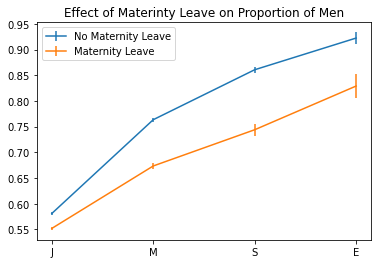

In [396]:
x = [1,2,3,4]
plt.errorbar(x=x, y=mean_nml[3:7], yerr=hw_nb[3:7], label='No Maternity Leave')
plt.errorbar(x=x, y=mean_ml[3:7], yerr=hw_est[3:7], label='Maternity Leave')
plt.legend()
xticks=['J','M','S','E']
plt.title('Effect of Materinty Leave on Proportion of Men')
plt.xticks(x,xticks)

# Productivity Model vs. Base Logit

In [397]:
ts = '4025'
sim_type = 'prod'

path = os.path.join(os.getcwd(), "simulation_data")
folder_path = os.path.join(path, "%s_%s_data" % (ts, sim_type))
listing = ts + "_" + sim_type + "_rawdata.csv"
path = os.path.join(folder_path, listing)
print(path)

df_p = pd.read_csv(path,header=None).T
df_p.head()

/Users/saniyavaidya/Documents/4580_final_project/simulation_data/4025_prod_data/4025_prod_rawdata.csv


,0,1,2,3,4,5,6
0,0.0,1.0,-2.15,0.624423,0.625495,0.614615,0.694872
1,0.0,1.0,-2.15,0.628942,0.605934,0.652308,0.600000
2,0.0,1.0,-2.15,0.625192,0.580000,0.613846,0.653846
3,0.0,1.0,-2.15,0.615481,0.616703,0.603077,0.710256
4,0.0,1.0,-2.15,0.625385,0.621758,0.675385,0.725641


In [398]:
df_p = df_p.rename(columns={0: "alpha", 1: "gamma", 2: "delta", 3: "% Men in J", 4: "% Men in M", 5: "% Men in S" , 6: "% Men in E"})
df_p['bias'] = (math.e**df_p['alpha']) / (1+math.e**df_p['alpha'])
df_p.head()

,alpha,gamma,delta,% Men in J,% Men in M,% Men in S,% Men in E,bias
0,0.0,1.0,-2.15,0.624423,0.625495,0.614615,0.694872,0.5
1,0.0,1.0,-2.15,0.628942,0.605934,0.652308,0.600000,0.5
2,0.0,1.0,-2.15,0.625192,0.580000,0.613846,0.653846,0.5
3,0.0,1.0,-2.15,0.615481,0.616703,0.603077,0.710256,0.5
4,0.0,1.0,-2.15,0.625385,0.621758,0.675385,0.725641,0.5


In [399]:
mean_p = df_p.mean()
std_p = df_p.std()
hw_p = 1.96*std_nml/math.sqrt(len(df_nml))

([<matplotlib.axis.XTick at 0x7fa990352220>,
 [Text(1, 0, 'J'), Text(2, 0, 'M'), Text(3, 0, 'S'), Text(4, 0, 'E')])

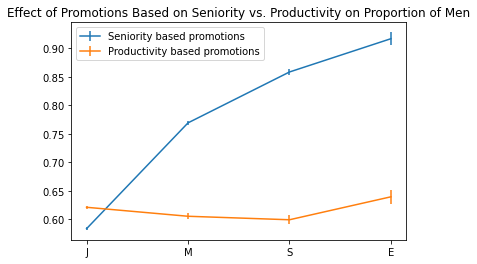

In [400]:
x = [1,2,3,4]
plt.errorbar(x=x, y=mean_nb[3:7], yerr=hw_nb[3:7], label='Seniority based promotions')
plt.errorbar(x=x, y=mean_p[3:7], yerr=hw_p[3:7], label='Productivity based promotions')
plt.legend()
xticks=['J','M','S','E']
plt.title('Effect of Promotions Based on Seniority vs. Productivity on Proportion of Men')
plt.xticks(x,xticks)